# Modelo 3: Regresión Logistica

Andrés Camilo Caballero Ayala

In [ ]:
# Manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_json("./data/FiltradoF.json", encoding="utf-8")

df["texto_completo"] = df["titulo-words"] + " " + df["descripcion-words"]

X = df["texto_completo"]
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000) 
X_train_vec = vectorizer.fit_transform(X_train.astype(str))
X_test_vec = vectorizer.transform(X_test.astype(str))

param_grid = {'C': [0.1, 1, 10, 100]} 
modelo = GridSearchCV(LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
modelo.fit(X_train_vec, y_train)

y_pred = modelo.best_estimator_.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)


# **Análisis y Evaluación del Modelo de Detección de Noticias Falsas**

## **1. Introducción**
En este análisis, se ha desarrollado un modelo de regresión logística para la detección de noticias falsas en español. Se han empleado técnicas de procesamiento de lenguaje natural (NLP) junto con la transformación de texto a valores numéricos mediante `CountVectorizer`. 

El objetivo principal es identificar automáticamente si una noticia es real o falsa basándose en el contenido textual, lo que permite mitigar la propagación de desinformación.

---

## **2. Algoritmos Utilizados**

El modelo seleccionado es **Regresión Logística**, un algoritmo de clasificación supervisada que predice la probabilidad de una observación perteneciente a una de las clases (en este caso, real o falsa).  

La elección de este modelo se debe a su simplicidad, interpretabilidad y buen desempeño en tareas de clasificación de texto. 

El flujo del procesamiento de datos incluye:
1. **Carga de datos:** Se parte de un dataset ya preprocesado en formato JSON.
2. **Vectorización del texto:** Se usa `CountVectorizer(binary=True)` para representar el texto en forma de matriz binaria.
3. **División de datos:** Se separa el dataset en entrenamiento (70%) y prueba (30%).
4. **Entrenamiento del modelo:** Se ajusta el modelo de regresión logística con regularización L2 para evitar sobreajuste.
5. **Evaluación:** Se miden métricas como precisión, recall, f1-score y se genera la matriz de confusión.

---

## **3. Evaluación del Modelo y Resultados**

### **3.1 Métricas de Desempeño**
El modelo alcanzó una **precisión del 89.68%**, lo que indica un buen desempeño en la clasificación. A continuación, se presentan los detalles:

In [2]:
print(f"Precisión del modelo: {accuracy:.4f}\n")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.8968

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      6641
           1       0.88      0.92      0.90      6641

    accuracy                           0.90     13282
   macro avg       0.90      0.90      0.90     13282
weighted avg       0.90      0.90      0.90     13282




### **3.2 Matriz de Confusión**
La matriz de confusión refleja la cantidad de predicciones correctas e incorrectas:

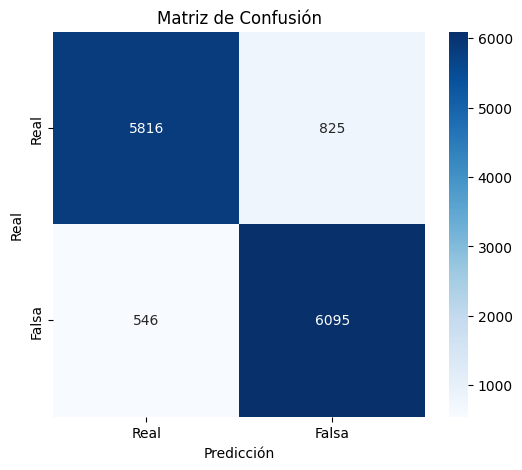

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Falsa"], yticklabels=["Real", "Falsa"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

### **3.3 Palabras Asociadas**

['ayuso' 'iglesias' 'bildu' 'montero' 'casado' 'compromis' 'iu' 'sanchez'
 'erc' 'podemos']
['equo' 'eajpnv' 'bng' 'vers' 'narbona' 'canaria' 'prieto' 'gallardo'
 'calvino' 'boluarte']


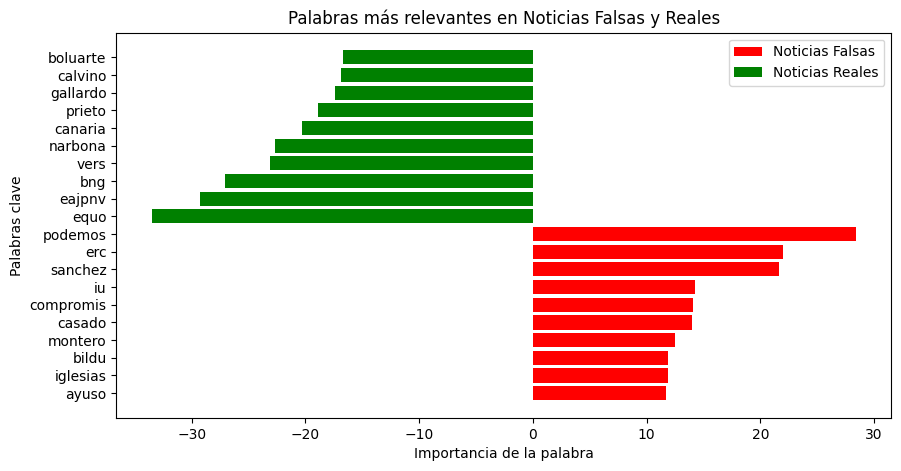

In [5]:
feature_names = vectorizer.get_feature_names_out()
coefs = modelo.best_estimator_.coef_[0]

top_fake_words = feature_names[np.argsort(coefs)[-10:]]  
top_real_words = feature_names[np.argsort(coefs)[:10]]  

plt.figure(figsize=(10,5))
plt.barh(top_fake_words, np.sort(coefs)[-10:], color="red", label="Noticias Falsas")
plt.barh(top_real_words, np.sort(coefs)[:10], color="green", label="Noticias Reales")
print(feature_names[np.argsort(coefs)[-10:]]  )
print(feature_names[np.argsort(coefs)[:10]]  )
plt.xlabel("Importancia de la palabra")
plt.ylabel("Palabras clave")
plt.legend()
plt.title("Palabras más relevantes en Noticias Falsas y Reales")
plt.show()


# **Desempeño del Modelo de Regresión Logística en la Clasificación de Noticias Falsas**

El modelo de **Regresión Logística** ha mostrado un rendimiento sólido en la detección de noticias falsas, alcanzando una **precisión del 89.68%**. Esto indica que en la mayoría de los casos, el modelo logra predecir correctamente si una noticia es verdadera o falsa.  

### **Matriz de Desempeño**
| Clase | Precisión | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| **Noticias Verdaderas (0)** | 0.91 | 0.88 | 0.89 | 6641 |
| **Noticias Falsas (1)** | 0.88 | 0.92 | 0.90 | 6641 |
| **Exactitud Total** | **0.90** | **0.90** | **0.90** | **13282** |

El **recall de 92%** en la detección de noticias falsas indica que el modelo identifica la gran mayoría de ellas, mientras que la **precisión de 88%** muestra que hay algunos casos en los que clasifica erróneamente noticias verdaderas como falsas.  

El **F1-score de 90%** confirma un balance adecuado entre estas métricas, asegurando que el modelo no favorezca en exceso ninguna clase.  

Dado su desempeño, este modelo es apto para su implementación en plataformas de **verificación de noticias**, aunque su efectividad podría mejorarse mediante técnicas de **ingeniería de características**, ajuste de hiperparámetros o incluso el uso de modelos más complejos como árboles de decisión o redes neuronales.  

---

## **Análisis de las Palabras Más Relevantes en la Clasificación de Noticias**  

El análisis de las palabras que más influyen en la clasificación del modelo proporciona información valiosa sobre los patrones lingüísticos utilizados en noticias verdaderas y falsas.  

### **1. Términos que Aumentan la Probabilidad de una Noticia Falsa**  
El modelo asigna mayor peso a palabras como:  

`equo`, `eajpnv`, `bng`, `vers`, `narbona`, `canaria`, `prieto`, `gallardo`, `calviño`, `boluarte`.  

Estos términos están asociados a partidos políticos menos convencionales o figuras menos mediáticas, lo que puede sugerir narrativas alternativas o sesgadas.  

### **2. Términos Asociados a Noticias Verdaderas**  
En contraste, palabras como:  

`ayuso`, `iglesias`, `bildu`, `montero`, `casado`, `compromis`, `iu`, `sánchez`, `erc`, `podemos`.  

Estos términos están más presentes en medios tradicionales, lo que puede indicar un tono más neutral y basado en hechos.  

---

## **Aplicaciones y Utilidad del Modelo**  

Este análisis es clave para la organización porque permite:  
- **Optimizar la clasificación de noticias:** Incorporando estas palabras clave en la fase de preprocesamiento para mejorar la detección.  
- **Diseñar alertas tempranas:** Si una noticia contiene múltiples términos asociados a falsedades, se puede marcar para verificación manual.  
- **Identificar patrones de desinformación:** Analizando la evolución del lenguaje utilizado en noticias falsas para ajustar continuamente el modelo.  
- **Integración en plataformas de validación:** Ayudando a mejorar los sistemas de monitoreo de contenido en redes sociales y medios digitales.  
